# Lab 13 - Ridge Regression
# Lecture 13

In [1]:
ted = readRDS('data/ted/ted_talks.rds')

In [3]:
dim(ted)

[1] 2550  452

In [4]:
head(ted)

,duration,film_date,num_speaker,published_date,views,wordfreq_children,wordfreq_creativity,wordfreq_culture,wordfreq_dance,wordfreq_education,...,ratingfreq_Longwinded,ratingfreq_Confusing,ratingfreq_Informative,ratingfreq_Fascinating,ratingfreq_Unconvincing,ratingfreq_Persuasive,ratingfreq_Jaw.dropping,ratingfreq_OK,ratingfreq_Obnoxious,ratingfreq_Inspiring
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1164,1140825600,1,1151367060,47227110,1,1,1,1,1,...,0.004123601,0.002578583,0.078273841,0.11274374,0.00319659,0.114054342,0.04729888,0.01250932,0.002226958,0.265572722
2,977,1140825600,1,1151367060,3200520,0,0,1,0,0,...,0.087874659,0.038487738,0.150885559,0.14066757,0.04495913,0.019073569,0.09128065,0.03950954,0.044618529,0.069141689
3,1286,1140739200,1,1151367060,1636292,0,0,0,0,0,...,0.036827195,0.027620397,0.139872521,0.08144476,0.05878187,0.009560907,0.05169972,0.08144476,0.019121813,0.050283286
4,1116,1140912000,1,1151367060,1697550,0,0,0,0,0,...,0.028165236,0.009656652,0.014216738,0.10193133,0.28701717,0.035407725,0.12339056,0.06169528,0.009388412,0.022800429
5,1190,1140566400,1,1151440680,12005869,0,0,0,0,0,...,0.004293521,0.002810304,0.002615144,0.21206089,0.11291959,0.179781421,0.14582358,0.09921936,0.009679938,0.002380952
6,1305,1138838400,1,1151440680,20685401,0,0,1,0,0,...,0.045975514,0.025853087,0.018559521,0.06759573,0.33934618,0.087913519,0.15778849,0.02871842,0.043566033,0.021815577


In [5]:
tdm = ted[,grep("word",colnames(ted),value=TRUE)]

In [6]:
head(colnames(tdm))

[1] "wordfreq_children"   "wordfreq_creativity" "wordfreq_culture"   
[4] "wordfreq_dance"      "wordfreq_education"  "wordfreq_parenting"

In [7]:
df = data.frame(views=ted$views,tdm)
head(df)

,views,wordfreq_children,wordfreq_creativity,wordfreq_culture,wordfreq_dance,wordfreq_education,wordfreq_parenting,wordfreq_teaching,wordfreq_alternative,wordfreq_cars,...,wordfreq_capitalism,wordfreq_refugees,wordfreq_grammar,wordfreq_discovery,wordfreq_blockchain,wordfreq_tednyc,wordfreq_residency,wordfreq_biosphere,wordfreq_epidemiology,wordfreq_funny
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47227110,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3200520,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1636292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1697550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12005869,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,20685401,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mod = lm(log(views)~.,data=df)
beta_hat = mod$coef

In [10]:
sum(!is.finite(beta_hat))

[1] 21

In [11]:
qr(tdm)$rank

[1] 412

In [12]:
dim(tdm)

[1] 2550  433

In [15]:
tail(svd(tdm)$d)

[1] 3.819229e-15 3.819229e-15 3.485523e-15 2.780501e-15 2.296117e-15
[6] 9.860549e-16

In [19]:
X = as.matrix(tdm)
xtx=t(X)%*%X
kappa(xtx)

[1] 2.197666e+35

In [24]:
max(eigen(xtx)$values)/abs(min(eigen(xtx)$values))

[1] 1.583674e+16

# Ridge Regression Solution!

In [26]:
install.packages('glmnet')

Installing package into 'C:/Users/huntg/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependency 'shape'




package 'shape' successfully unpacked and MD5 sums checked
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\huntg\AppData\Local\Temp\Rtmpkvjs0s\downloaded_packages


In [27]:
library('glmnet')

Warning message:
"package 'glmnet' was built under R version 4.0.4"
Loading required package: Matrix

Loaded glmnet 4.1-1



In [28]:
?glmnet

glmnet {glmnet},R Documentation
x,"input matrix, of dimension nobs x nvars; each row is an observation vector. Can be in sparse matrix format (inherit from class ""sparseMatrix"" as in package Matrix)"
y,"response variable. Quantitative for family=""gaussian"", or family=""poisson"" (non-negative counts). For family=""binomial"" should be either a factor with two levels, or a two-column matrix of counts or proportions (the second column is treated as the target class; for a factor, the last level in alphabetical order is the target class). For family=""multinomial"", can be a nc>=2 level factor, or a matrix with nc columns of counts or proportions. For either ""binomial"" or ""multinomial"", if y is presented as a vector, it will be coerced into a factor. For family=""cox"", preferably a Surv object from the survival package: see Details section for more information. For family=""mgaussian"", y is a matrix of quantitative responses."
family,"Either a character string representing one of the built-in families, or else a glm() family object. For more information, see Details section below or the documentation for response type (above)."
weights,observation weights. Can be total counts if responses are proportion matrices. Default is 1 for each observation
offset,"A vector of length nobs that is included in the linear predictor (a nobs x nc matrix for the ""multinomial"" family). Useful for the ""poisson"" family (e.g. log of exposure time), or for refining a model by starting at a current fit. Default is NULL. If supplied, then values must also be supplied to the predict function."
alpha,"The elasticnet mixing parameter, with 0≤α≤ 1. The penalty is defined as (1-α)/2||β||_2^2+α||β||_1. alpha=1 is the lasso penalty, and alpha=0 the ridge penalty."
nlambda,The number of lambda values - default is 100.
lambda.min.ratio,"Smallest value for lambda, as a fraction of lambda.max, the (data derived) entry value (i.e. the smallest value for which all coefficients are zero). The default depends on the sample size nobs relative to the number of variables nvars. If nobs > nvars, the default is 0.0001, close to zero. If nobs < nvars, the default is 0.01. A very small value of lambda.min.ratio will lead to a saturated fit in the nobs < nvars case. This is undefined for ""binomial"" and ""multinomial"" models, and glmnet will exit gracefully when the percentage deviance explained is almost 1."
lambda,"A user supplied lambda sequence. Typical usage is to have the program compute its own lambda sequence based on nlambda and lambda.min.ratio. Supplying a value of lambda overrides this. WARNING: use with care. Avoid supplying a single value for lambda (for predictions after CV use predict() instead). Supply instead a decreasing sequence of lambda values. glmnet relies on its warms starts for speed, and its often faster to fit a whole path than compute a single fit."
standardize,"Logical flag for x variable standardization, prior to fitting the model sequence. The coefficients are always returned on the original scale. Default is standardize=TRUE. If variables are in the same units already, you might not wish to standardize. See details below for y standardization with family=""gaussian""."


In [29]:
dim(X)

[1] 2550  433

In [30]:
y = ted$views

In [50]:
fit.ridge = glmnet(x=X,y=log(y),family="gaussian",alpha=0)

In [51]:
fit.ridge


Call:  glmnet(x = X, y = log(y), family = "gaussian", alpha = 0) 

     Df  %Dev  Lambda
1   433  0.00 139.200
2   433  0.91 126.800
3   433  0.99 115.600
4   433  1.09 105.300
5   433  1.19  95.930
6   433  1.30  87.410
7   433  1.42  79.650
8   433  1.55  72.570
9   433  1.70  66.120
10  433  1.85  60.250
11  433  2.02  54.900
12  433  2.20  50.020
13  433  2.40  45.580
14  433  2.61  41.530
15  433  2.84  37.840
16  433  3.09  34.480
17  433  3.36  31.410
18  433  3.65  28.620
19  433  3.96  26.080
20  433  4.29  23.760
21  433  4.64  21.650
22  433  5.02  19.730
23  433  5.42  17.980
24  433  5.85  16.380
25  433  6.30  14.920
26  433  6.78  13.600
27  433  7.29  12.390
28  433  7.82  11.290
29  433  8.38  10.290
30  433  8.96   9.373
31  433  9.57   8.540
32  433 10.21   7.781
33  433 10.87   7.090
34  433 11.55   6.460
35  433 12.25   5.886
36  433 12.96   5.363
37  433 13.70   4.887
38  433 14.45   4.453
39  433 15.21   4.057
40  433 15.99   3.697
41  433 16.77   3.368
42  433 

In [34]:
dim(fit.ridge$beta)

[1] 433 100

In [52]:
length(fit.ridge$lambda)

[1] 100

In [53]:
dim(X)

[1] 2550  433

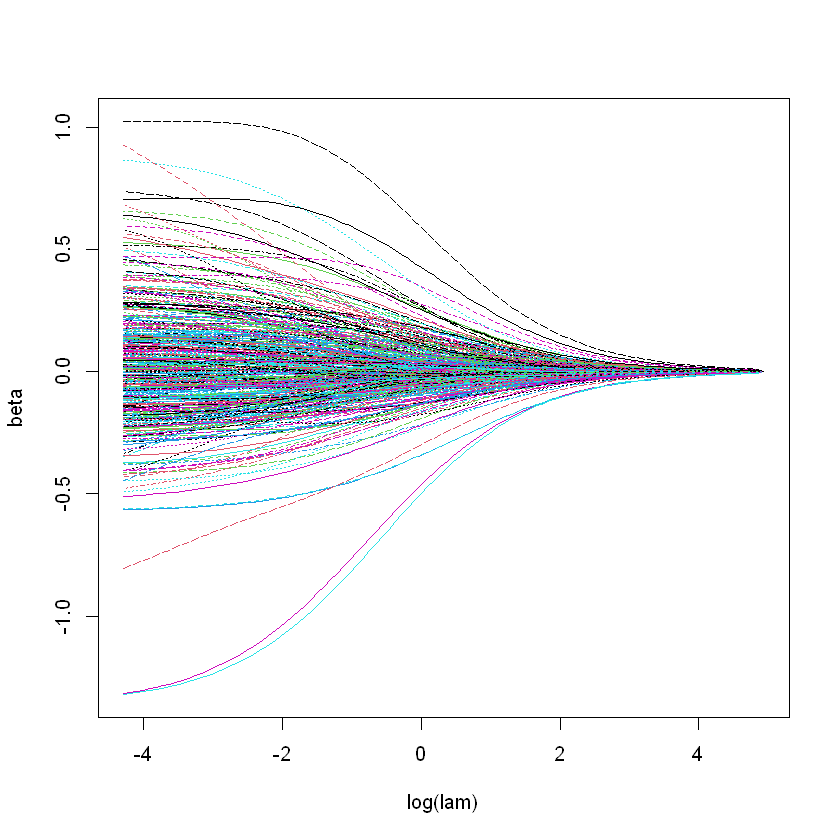

In [54]:
matplot(log(fit.ridge$lambda),t(fit.ridge$beta),type='l',xlab="log(lam)",ylab="beta")

In [61]:
lam_seq = 10^seq(-10,10,length.out=100)
head(lam_seq)

[1] 1.000000e-10 1.592283e-10 2.535364e-10 4.037017e-10 6.428073e-10
[6] 1.023531e-09

In [62]:
fit.ridge = glmnet(x=X,y=log(y),family="gaussian",alpha=0,lambda=lam_seq)

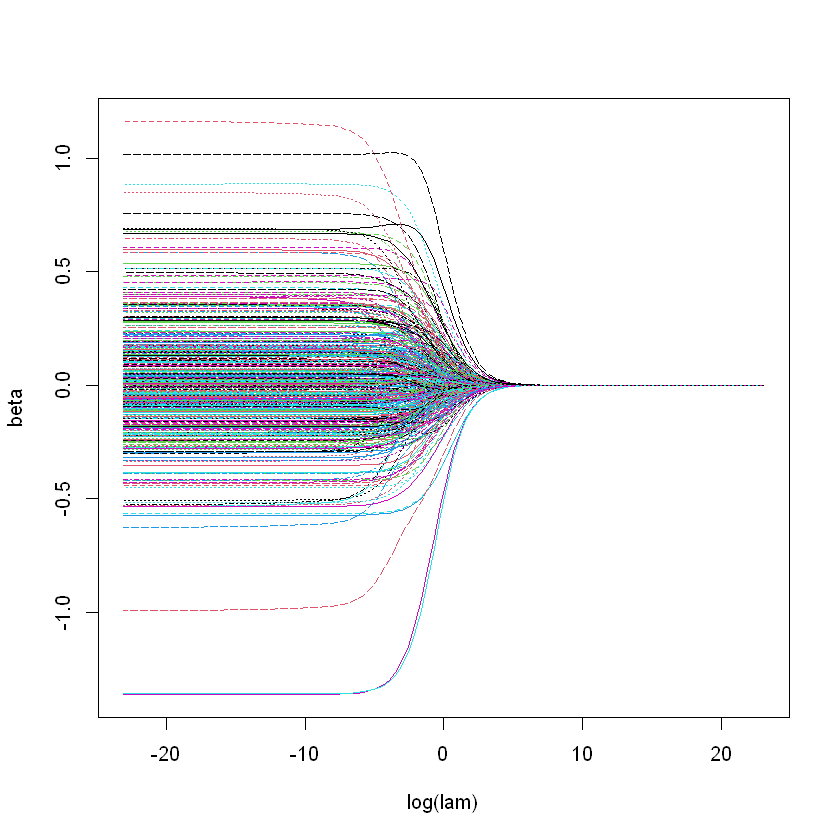

In [63]:
matplot(log(fit.ridge$lambda),t(fit.ridge$beta),type='l',xlab="log(lam)",ylab="beta")

In [64]:
cv.ridge = cv.glmnet(x=X,y=log(y),family="gaussian",alpha=0,lambda=lam_seq)

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collaps

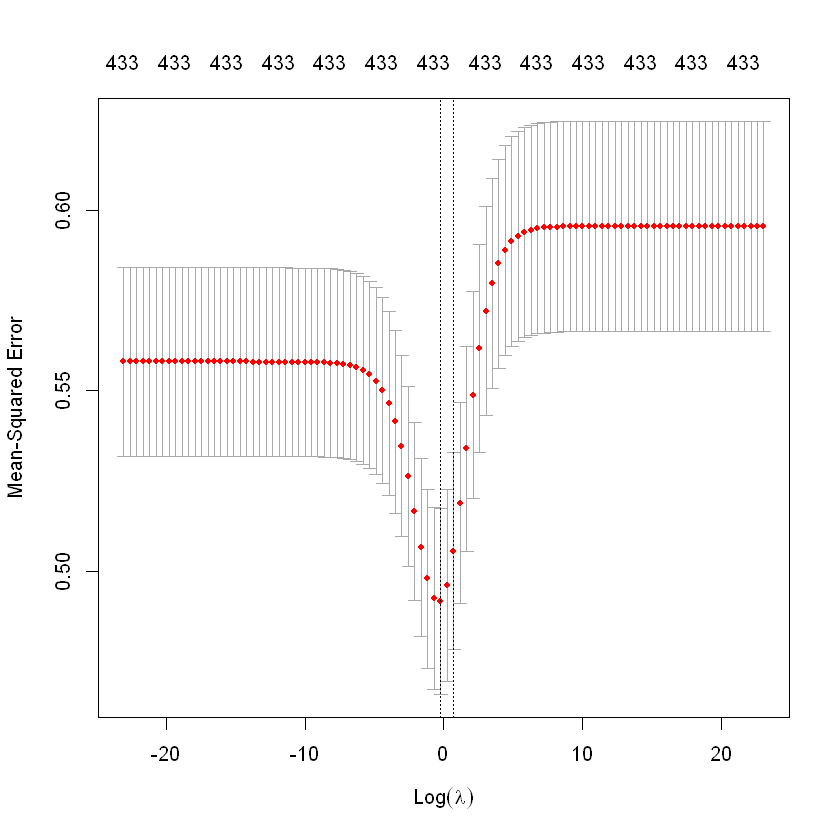

In [65]:
plot(cv.ridge)

In [66]:
cv.ridge$lambda.min

[1] 0.7924829

In [67]:
best.ridge = glmnet(x=X,y=log(y),family="gaussian",alpha=0,lambda=cv.ridge$lambda.min)